In [1]:
import tensorflow as tf
import numpy as np

# **Basic : Rank and shapes**

Rank-0 Tensor : A scalar contains a single value, and no "axes".

In [2]:
rank_0_tensor = tf.constant(4)
print(rank_0_tensor)

tf.Tensor(4, shape=(), dtype=int32)


Rank-1 Tensor : List of values

In [3]:
rank_1_tensor = tf.constant([2.0, 3.0, 4.0])
print(rank_1_tensor)

tf.Tensor([2. 3. 4.], shape=(3,), dtype=float32)


Rank-2 Tensor has 2 axes, known as matrix

In [4]:
rank_2_tensor = tf.constant([[1, 2],
                             [3, 4],
                             [5, 6]], dtype=tf.float16)
print(rank_2_tensor)

tf.Tensor(
[[1. 2.]
 [3. 4.]
 [5. 6.]], shape=(3, 2), dtype=float16)


Tensor can have n axes, axes are known as dimensions

In [5]:
rank_3_tensor = tf.constant([
  [[0, 1, 2, 3, 4],
   [5, 6, 7, 8, 9]],
  [[10, 11, 12, 13, 14],
   [15, 16, 17, 18, 19]],
  [[20, 21, 22, 23, 24],
   [25, 26, 27, 28, 29]],])

print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


Basic math on tensors, including addition, element-wise multiplication, and matrix multiplication.

In [6]:
a = tf.constant([[1, 2],
                 [3, 4]])
b = tf.constant([[1, 1],
                 [1, 1]]) # Could have also said `tf.ones([2,2])`

print(tf.add(a, b), "\n")
print(tf.multiply(a, b), "\n")
print(tf.matmul(a, b), "\n")

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



In [7]:
print(a + b, "\n") # element-wise addition
print(a * b, "\n") # element-wise multiplication
print(a @ b, "\n") # matrix multiplication

tf.Tensor(
[[2 3]
 [4 5]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[1 2]
 [3 4]], shape=(2, 2), dtype=int32) 

tf.Tensor(
[[3 3]
 [7 7]], shape=(2, 2), dtype=int32) 



Tensors for different operations

In [8]:
c = tf.constant([[4.0, 5.0], [10.0, 1.0]])

# Find the largest value
print(tf.reduce_max(c))
# Find the index of the largest value
print(tf.argmax(c))
# Compute the softmax
print(tf.nn.softmax(c))

tf.Tensor(10.0, shape=(), dtype=float32)
tf.Tensor([1 0], shape=(2,), dtype=int64)
tf.Tensor(
[[2.6894143e-01 7.3105860e-01]
 [9.9987662e-01 1.2339458e-04]], shape=(2, 2), dtype=float32)


**Shape:** The length (number of elements) of each of the axes of a tensor.


**Rank:** Number of tensor axes. A scalar has rank 0, a vector has rank 1, a matrix is rank 2.


**Axis or Dimension:** A particular dimension of a tensor.


**Size:** The total number of items in the tensor, the product shape vector.

Tensors and tf.TensorShape objects have convenient properties for accessing these:

In [9]:
rank_4_tensor = tf.zeros([3, 2, 4, 5])

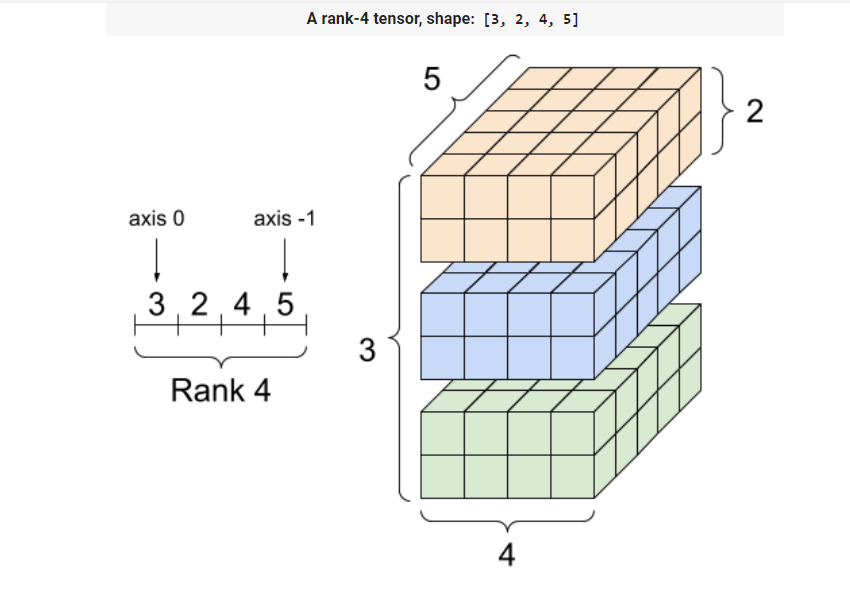

In [10]:
print("Type of every element:", rank_4_tensor.dtype)
print("Number of axes:", rank_4_tensor.ndim)
print("Shape of tensor:", rank_4_tensor.shape)
print("Elements along axis 0 of tensor:", rank_4_tensor.shape[0])
print("Elements along the last axis of tensor:", rank_4_tensor.shape[-1])
print("Total number of elements (3*2*4*5): ", tf.size(rank_4_tensor).numpy())

Type of every element: <dtype: 'float32'>
Number of axes: 4
Shape of tensor: (3, 2, 4, 5)
Elements along axis 0 of tensor: 3
Elements along the last axis of tensor: 5
Total number of elements (3*2*4*5):  120


In the above example


3 : Batch

2 : Width

4 : Height

5 : Features

## Indexing

TensorFlow follows standard Python indexing rules.

indexes start at 0

negative indices count backwards from the end

colons, :, are used for slices: start:stop:step

In [11]:
rank_1_tensor = tf.constant([0, 1, 1, 2, 3, 5, 8, 13, 21, 34])
print(rank_1_tensor.numpy())

[ 0  1  1  2  3  5  8 13 21 34]


Indexing with a scalar removes the axis

In [12]:
print("First:", rank_1_tensor[0].numpy())
print("Second:", rank_1_tensor[1].numpy())
print("Last:", rank_1_tensor[-1].numpy())

First: 0
Second: 1
Last: 34


Indexing with a `:` slice keeps the axis:

In [13]:
print("Everything:", rank_1_tensor[:].numpy())
print("Before 4:", rank_1_tensor[:4].numpy())
print("From 4 to the end:", rank_1_tensor[4:].numpy())
print("From 2, before 7:", rank_1_tensor[2:7].numpy())
print("Every other item:", rank_1_tensor[::2].numpy())
print("Reversed:", rank_1_tensor[::-1].numpy())

Everything: [ 0  1  1  2  3  5  8 13 21 34]
Before 4: [0 1 1 2]
From 4 to the end: [ 3  5  8 13 21 34]
From 2, before 7: [1 2 3 5 8]
Every other item: [ 0  1  3  8 21]
Reversed: [34 21 13  8  5  3  2  1  1  0]


### Multi-axis indexing

Higher rank tensors are indexed by passing multiple indices.

The exact same rules as in the single-axis case apply to each axis independently.

In [14]:
print(rank_2_tensor.numpy())

[[1. 2.]
 [3. 4.]
 [5. 6.]]


Passing an integer for each index, the result is a scalar.

In [15]:
# Pull out a single value from a 2-rank tensor
print(rank_2_tensor[1, 1].numpy())

4.0


You can index using any combination of integers and slices:

In [16]:
# Get row and column tensors
print("Second row:", rank_2_tensor[1, :].numpy())
print("Second column:", rank_2_tensor[:, 1].numpy())
print("Last row:", rank_2_tensor[-1, :].numpy())
print("First item in last column:", rank_2_tensor[0, -1].numpy())
print("Skip the first row:")
print(rank_2_tensor[1:, :].numpy(), "\n")

Second row: [3. 4.]
Second column: [2. 4. 6.]
Last row: [5. 6.]
First item in last column: 2.0
Skip the first row:
[[3. 4.]
 [5. 6.]] 



Here is an example with a 3-axis tensor:

In [17]:
print(rank_3_tensor[:, :, 4])

tf.Tensor(
[[ 4  9]
 [14 19]
 [24 29]], shape=(3, 2), dtype=int32)


## Manipulating Shapes

Reshaping a tensor is of great utility. 


In [18]:
# Shape returns a `TensorShape` object that shows the size along each axis
x = tf.constant([[1], [2], [3]])
print(x.shape)

(3, 1)


In [19]:
# You can convert this object into a Python list, too
print(x.shape.as_list())

[3, 1]


You can reshape a tensor into a new shape. The `tf.reshape` operation is fast and cheap as the underlying data does not need to be duplicated.

In [20]:
# You can reshape a tensor to a new shape.
# Note that you're passing in a list
reshaped = tf.reshape(x, [1, 3])

In [21]:
print(x.shape)
print(reshaped.shape)

(3, 1)
(1, 3)


The data maintains its layout in memory and a new tensor is created, with the requested shape, pointing to the same data. TensorFlow uses C-style "row-major" memory ordering, where incrementing the rightmost index corresponds to a single step in memory.

In [22]:
print(rank_3_tensor)

tf.Tensor(
[[[ 0  1  2  3  4]
  [ 5  6  7  8  9]]

 [[10 11 12 13 14]
  [15 16 17 18 19]]

 [[20 21 22 23 24]
  [25 26 27 28 29]]], shape=(3, 2, 5), dtype=int32)


If you flatten a tensor you can see what order it is laid out in memory.

In [23]:
# A `-1` passed in the `shape` argument says "Whatever fits".
print(tf.reshape(rank_3_tensor, [-1]))

tf.Tensor(
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29], shape=(30,), dtype=int32)


Typically the only reasonable use of `tf.reshape` is to combine or split adjacent axes (or add/remove `1`s).

For this 3x2x5 tensor, reshaping to (3x2)x5 or 3x(2x5) are both reasonable things to do, as the slices do not mix:

In [24]:
print(tf.reshape(rank_3_tensor, [3*2, 5]), "\n")
print(tf.reshape(rank_3_tensor, [3, -1]))

tf.Tensor(
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]
 [25 26 27 28 29]], shape=(6, 5), dtype=int32) 

tf.Tensor(
[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]], shape=(3, 10), dtype=int32)


Reshaping will "work" for any new shape with the same total number of elements, but it will not do anything useful if we do not respect the order of the axes.

Swapping axes in `tf.reshape` does not work; we need `tf.transpose` for that. 


# **Broadcasting**

In short, under certain conditions, smaller tensors are "stretched" automatically to fit larger tensors when running combined operations on them.

The simplest and most common case is when you attempt to multiply or add a tensor to a scalar. In that case, the scalar is broadcast to be the same shape as the other argument.

In [25]:
x = tf.constant([1, 2, 3])

y = tf.constant(2)
z = tf.constant([2, 2, 2])
# All of these are the same computation
print(tf.multiply(x, 2))
print(x * y)
print(x * z)

tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)
tf.Tensor([2 4 6], shape=(3,), dtype=int32)


Likewise, axes with length 1 can be stretched out to match the other arguments.  Both arguments can be stretched in the same computation.

In this case a 3x1 matrix is element-wise multiplied by a 1x4 matrix to produce a 3x4 matrix. Note how the leading 1 is optional: The shape of y is `[4]`.

In [26]:
# These are the same computations
x = tf.reshape(x,[3,1])
y = tf.range(1, 5)
print(x, "\n")
print(y, "\n")
print(tf.multiply(x, y))

tf.Tensor(
[[1]
 [2]
 [3]], shape=(3, 1), dtype=int32) 

tf.Tensor([1 2 3 4], shape=(4,), dtype=int32) 

tf.Tensor(
[[ 1  2  3  4]
 [ 2  4  6  8]
 [ 3  6  9 12]], shape=(3, 4), dtype=int32)


In [27]:
print(tf.broadcast_to(tf.constant([1, 2, 3]), [3, 3]))

tf.Tensor(
[[1 2 3]
 [1 2 3]
 [1 2 3]], shape=(3, 3), dtype=int32)


# **Ragged Tensors**

A tensor with variable numbers of elements along some axis is called "ragged". Use `tf.ragged.RaggedTensor` for ragged data.

For example, This cannot be represented as a regular tensor:

In [28]:
ragged_list = [
    [0, 1, 2, 3],
    [4, 5],
    [6, 7, 8],
    [9]]

In [29]:
try:
  tensor = tf.constant(ragged_list)
except Exception as e:
  print(f"{type(e).__name__}: {e}")

ValueError: Can't convert non-rectangular Python sequence to Tensor.


Instead create a `tf.RaggedTensor` using `tf.ragged.constant`:

In [30]:
ragged_tensor = tf.ragged.constant(ragged_list)
print(ragged_tensor)

<tf.RaggedTensor [[0, 1, 2, 3], [4, 5], [6, 7, 8], [9]]>


The shape of a `tf.RaggedTensor` will contain some axes with unknown lengths:

In [31]:
print(ragged_tensor.shape)

(4, None)


# **String tensors**

`tf.string` is a `dtype`, which is to say you can represent data as strings (variable-length byte arrays) in tensors.

The strings are atomic and cannot be indexed the way Python strings are. The length of the string is not one of the axes of the tensor. See `tf.strings` for functions to manipulate them.

Here is a scalar string tensor:

In [32]:
# Tensors can be strings, too here is a scalar string.
scalar_string_tensor = tf.constant("Gray wolf")
print(scalar_string_tensor)

tf.Tensor(b'Gray wolf', shape=(), dtype=string)


And a vector of strings:

In [33]:
# If you have three string tensors of different lengths, this is OK.
tensor_of_strings = tf.constant(["Gray wolf",
                                 "Quick brown fox",
                                 "Lazy dog"])
# Note that the shape is (3,). The string length is not included.
print(tensor_of_strings)

tf.Tensor([b'Gray wolf' b'Quick brown fox' b'Lazy dog'], shape=(3,), dtype=string)


In the above printout the `b` prefix indicates that `tf.string` dtype is not a unicode string, but a byte-string. See the [Unicode Tutorial](https://www.tensorflow.org/tutorials/load_data/unicode) for more about working with unicode text in TensorFlow.

If you pass unicode characters they are utf-8 encoded.

In [34]:
tf.constant("🥳👍")

<tf.Tensor: shape=(), dtype=string, numpy=b'\xf0\x9f\xa5\xb3\xf0\x9f\x91\x8d'>

Some basic functions with strings can be found in `tf.strings`, including `tf.strings.split`.

In [35]:
# You can use split to split a string into a set of tensors
print(tf.strings.split(scalar_string_tensor, sep=" "))

tf.Tensor([b'Gray' b'wolf'], shape=(2,), dtype=string)


In [36]:
# ...but it turns into a `RaggedTensor` if you split up a tensor of strings,
# as each string might be split into a different number of parts.
print(tf.strings.split(tensor_of_strings))

<tf.RaggedTensor [[b'Gray', b'wolf'], [b'Quick', b'brown', b'fox'], [b'Lazy', b'dog']]>


And `tf.string.to_number`:

In [37]:
text = tf.constant("1 10 100")
print(tf.strings.to_number(tf.strings.split(text, " ")))

tf.Tensor([  1.  10. 100.], shape=(3,), dtype=float32)


Although you can't use `tf.cast` to turn a string tensor into numbers, you can convert it into bytes, and then into numbers.

In [38]:
byte_strings = tf.strings.bytes_split(tf.constant("Duck"))
byte_ints = tf.io.decode_raw(tf.constant("Duck"), tf.uint8)
print("Byte strings:", byte_strings)
print("Bytes:", byte_ints)

Byte strings: tf.Tensor([b'D' b'u' b'c' b'k'], shape=(4,), dtype=string)
Bytes: tf.Tensor([ 68 117  99 107], shape=(4,), dtype=uint8)


In [39]:
# Or split it up as unicode and then decode it
unicode_bytes = tf.constant("アヒル 🦆")
unicode_char_bytes = tf.strings.unicode_split(unicode_bytes, "UTF-8")
unicode_values = tf.strings.unicode_decode(unicode_bytes, "UTF-8")

print("\nUnicode bytes:", unicode_bytes)
print("\nUnicode chars:", unicode_char_bytes)
print("\nUnicode values:", unicode_values)


Unicode bytes: tf.Tensor(b'\xe3\x82\xa2\xe3\x83\x92\xe3\x83\xab \xf0\x9f\xa6\x86', shape=(), dtype=string)

Unicode chars: tf.Tensor([b'\xe3\x82\xa2' b'\xe3\x83\x92' b'\xe3\x83\xab' b' ' b'\xf0\x9f\xa6\x86'], shape=(5,), dtype=string)

Unicode values: tf.Tensor([ 12450  12498  12523     32 129414], shape=(5,), dtype=int32)


The `tf.string` dtype is used for all raw bytes data in TensorFlow. The `tf.io` module contains functions for converting data to and from bytes, including decoding images and parsing csv.

## Sparse tensors

Sometimes, your data is sparse, like a very wide embedding space.  TensorFlow supports `tf.sparse.SparseTensor` and related operations to store sparse data efficiently.

In [40]:
# Sparse tensors store values by index in a memory-efficient manner
sparse_tensor = tf.sparse.SparseTensor(indices=[[0, 0], [1, 2]],
                                       values=[1, 2],
                                       dense_shape=[3, 4])
print(sparse_tensor, "\n")

# You can convert sparse tensors to dense
print(tf.sparse.to_dense(sparse_tensor))

SparseTensor(indices=tf.Tensor(
[[0 0]
 [1 2]], shape=(2, 2), dtype=int64), values=tf.Tensor([1 2], shape=(2,), dtype=int32), dense_shape=tf.Tensor([3 4], shape=(2,), dtype=int64)) 

tf.Tensor(
[[1 0 0 0]
 [0 0 2 0]
 [0 0 0 0]], shape=(3, 4), dtype=int32)


# **NumPy Compatibility**


Converting between a TensorFlow tf.Tensors and a NumPy ndarray is easy:

TensorFlow operations automatically convert NumPy ndarrays to Tensors.

NumPy operations automatically convert Tensors to NumPy ndarrays.

Tensors are explicitly converted to NumPy ndarrays using their .numpy() method.These conversions are typically cheap since the array and tf.Tensor share the underlying memory representation, if possible. However, sharing the underlying representation isn't always possible since the tf.Tensor may be hosted in GPU memory while NumPy arrays are always backed by host memory, and the conversion involves a copy from GPU to host memory.

In [41]:
import numpy as np

ndarray = np.ones([3, 3])

print("TensorFlow operations convert numpy arrays to Tensors automatically")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("And NumPy operations convert Tensors to numpy arrays automatically")
print(np.add(tensor, 1))

print("The .numpy() method explicitly converts a Tensor to a numpy array")
print(tensor.numpy())

TensorFlow operations convert numpy arrays to Tensors automatically
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
And NumPy operations convert Tensors to numpy arrays automatically
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
The .numpy() method explicitly converts a Tensor to a numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


# **EINSUM Practice**

### **Matrix Multiplication**

In [42]:
m0 = tf.random.normal(shape=[2, 3])
m1 = tf.random.normal(shape=[3, 5])
e = tf.einsum('ij,jk->ik', m0, m1)
# output[i,k] = sum_j m0[i,j] * m1[j, k]

print(e.shape)

e = tf.einsum('ij,jk', m0, m1)  # output[i,k] = sum_j m0[i,j] * m1[j, k]
print(e.shape)

(2, 5)
(2, 5)


### **Dot Product**

In [43]:
u = tf.random.normal(shape=[5])
v = tf.random.normal(shape=[5])
e = tf.einsum('i,i->', u, v)  # output = sum_i u[i]*v[i]
print(e.shape)

()


### **Outer Product**

In [44]:
u = tf.random.normal(shape=[3])
v = tf.random.normal(shape=[5])
e = tf.einsum('i,j->ij', u, v)  # output[i,j] = u[i]*v[j]
print(e.shape)

(3, 5)


### **Transpose**

In [45]:
m = tf.ones(2,3)
e = tf.einsum('ij->ji', m0)  # output[j,i] = m0[i,j]
print(e.shape)

(3, 2)


### **Diag**

In [46]:
m = tf.reshape(tf.range(9), [3,3])
diag = tf.einsum('ii->i', m)
print(diag.shape)

(3,)


### **Trace**

In [47]:
# Repeated indices are summed.
trace = tf.einsum('ii', m)  # output[j,i] = trace(m) = sum_i m[i, i]
assert trace == sum(diag)
print(trace.shape)

()


### **Batch Matrix Multiplication**

In [48]:
s = tf.random.normal(shape=[7,5,3])
t = tf.random.normal(shape=[7,3,2])
e = tf.einsum('bij,bjk->bik', s, t)
# output[a,i,k] = sum_j s[a,i,j] * t[a, j, k]
print(e.shape)

(7, 5, 2)


# **Tensorflow 2 + Keras Practice**




This short introduction uses [Keras](https://www.tensorflow.org/guide/keras/overview) to:

1. Load a prebuilt dataset.
1. Build a neural network machine learning model that classifies images.
2. Train this neural network.
3. Evaluate the accuracy of the model.

**Import Tensorflow**

In [49]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.8.0


**Load Dataset**

In [50]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11501568/11490434 [==============================] - 0s 0us/step


**Building Model**

In [51]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

Output of this model is termed as logits

In [52]:
predictions = model(x_train[:1]).numpy()
predictions

array([[-0.17572522,  0.15321976,  0.82272583,  1.2141653 , -0.09046598,
        -0.09584264,  0.38446903,  1.113056  , -0.3709675 , -0.28177285]],
      dtype=float32)

Activation function (softmax) is used to converts these logits to probabilities for each class

In [53]:
tf.nn.softmax(predictions).numpy()

array([[0.05437284, 0.07555113, 0.14757194, 0.21827489, 0.05921198,
        0.05889448, 0.09520752, 0.19728431, 0.04472902, 0.04890194]],
      dtype=float32)

*losses.SparseCategoricalCrossentropy* is used to define loss function for training which takes a vector of logits and a True index and returns a scalar loss for each example.

In [54]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

This loss is equal to the negative log probability of the true class: The loss is zero if the model is sure of the correct class.

In [55]:
loss_fn(y_train[:1], predictions).numpy()

2.832008

Configure and compile the model using Keras Model.compile. Set the optimizer class to adam, set the loss to the loss_fn function you defined earlier, and specify a metric to be evaluated for the model by setting the metrics parameter to accuracy.

In [56]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

**Train and Evaluate the model**

Model.fit method to adjust your model parameters and minimize the loss

In [57]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2920 - accuracy: 0.9155
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1419 - accuracy: 0.9581
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1077 - accuracy: 0.9675
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0858 - accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0735 - accuracy: 0.9777


Model.evaluate method checks the models performance, usually on a Validation-set

In [58]:
model.evaluate(x_test,  y_test, verbose=2)

313/313 - 1s - loss: 0.0813 - accuracy: 0.9745 - 530ms/epoch - 2ms/step


[0.08127441257238388, 0.9745000004768372]

To return a probability, you can wrap the trained model, and attach the softmax to it

In [59]:
probability_model = tf.keras.Sequential([
  model,
  tf.keras.layers.Softmax()
])

In [60]:
probability_model(x_test[:5])

<tf.Tensor: shape=(5, 10), dtype=float32, numpy=
array([[1.7902385e-08, 2.3895227e-10, 3.9407432e-08, 5.9413578e-06,
        2.6123353e-11, 9.5096482e-08, 1.0986291e-13, 9.9998975e-01,
        7.8521111e-08, 4.1364583e-06],
       [7.5625920e-08, 7.1845989e-06, 9.9998081e-01, 1.1160054e-05,
        8.0214384e-17, 6.6173715e-07, 1.1860684e-09, 1.9441336e-10,
        1.7863334e-07, 3.0385270e-13],
       [1.3794462e-06, 9.9653876e-01, 7.8247790e-04, 4.1983440e-05,
        1.1354442e-04, 2.0550857e-05, 1.9611149e-05, 1.7993782e-03,
        6.7658594e-04, 5.7487396e-06],
       [9.9979931e-01, 1.9777313e-09, 3.0281908e-05, 5.9654974e-07,
        1.5488034e-07, 4.0057221e-05, 6.5518740e-05, 1.2037468e-05,
        3.1373382e-08, 5.2036467e-05],
       [6.8139043e-06, 1.3982081e-08, 3.2163591e-06, 8.9756940e-09,
        9.8294479e-01, 5.6781825e-08, 1.7907105e-05, 5.5620068e-05,
        1.3069077e-06, 1.6970357e-02]], dtype=float32)>

References:

1. https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/quickstart/beginner.ipynb#scrollTo=cnqOZtUp1YR_

2. https://www.tensorflow.org/guide/tensor

3. https://colab.sandbox.google.com/github/tensorflow/docs/blob/master/site/en/guide/tensor.ipynb


